<a href="https://colab.research.google.com/github/wisamabdullah85/Machine-Learning-BitCoin/blob/main/DatasetBitcoin_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline


In [65]:
# قراءة البيانات من ملف CSV
data = pd.read_csv('/content/datasetbcfinalmiss.csv')

In [66]:
# Print the first five rows
# NaN means missing data
data.head()

,Last Price,Open Price,Max,Min,Size,Change Persent,Class
0,3597.2,3785.7,4070.5,3561.3,3.80,0.0497,Bitcoin
1,3677.8,3597.3,3715.2,3473.2,3.50,0.0224,Bitcoin
2,3570.9,3676.2,3699.1,3465.2,3.16,0.0291,Bitcoin
3,3502.5,3570.9,3583.2,3368.2,3.68,0.0192,Bitcoin
4,3661.4,3502.3,3721.1,3382.5,3.78,0.0454,Bitcoin


In [67]:
# Let's see the data types and non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Last Price      2698 non-null   float64
 1   Open Price      2740 non-null   float64
 2   Max             2740 non-null   float64
 3   Min             2740 non-null   float64
 4   Size            2738 non-null   float64
 5   Change Persent  2740 non-null   float64
 6   Class           2740 non-null   object 
dtypes: float64(6), object(1)
memory usage: 150.0+ KB


In [68]:
# This prints basic statistics for numerical columns
data.describe()

,Last Price,Open Price,Max,Min,Size,Change Persent
count,2698.000000,2740.000000,2740.000000,2740.000000,2738.000000,2740.000000
mean,1972.090376,1937.333705,2088.396625,1781.707454,113.561150,5474.532281
std,7942.475462,7881.037024,8474.909262,7241.345498,216.484212,16252.399715
min,0.001687,0.001687,0.001925,0.001291,1.000000,0.000000
25%,0.998400,0.998400,1.000300,0.985375,4.825000,0.024300
50%,2.898750,2.398770,2.785490,2.135680,15.400000,0.072500
75%,143.717750,141.187500,156.156500,121.655000,96.662500,0.183475
max,64398.600000,64397.200000,68990.600000,61347.200000,992.610000,90000.000000


In [69]:
print(data.columns)

Index(['Last Price', 'Open Price', 'Max', 'Min', 'Size', 'Change Persent',
       'Class'],
      dtype='object')


In [70]:
model_features = data.columns.drop('Class')
model_target = 'Class'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Last Price', 'Open Price', 'Max', 'Min', 'Size', 'Change Persent'], dtype='object')
Model target:  Class


In [71]:
import numpy as np

numerical_features_all = data[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = data[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)


Numerical columns: Index(['Last Price', 'Open Price', 'Max', 'Min', 'Size', 'Change Persent'], dtype='object')

Categorical columns: Index([], dtype='object')


In [72]:
data[model_target].value_counts()

Binance Coin         232
Bitcoin              209
Ethereum             209
Ripple               209
Litecoin             209
Bitcoin Cash         209
Tether               209
Tezos                209
Zcash                209
Pax Dollar           209
Ethereum Classic     209
Dogecoin             209
USD Coin             209
Name: Class, dtype: int64

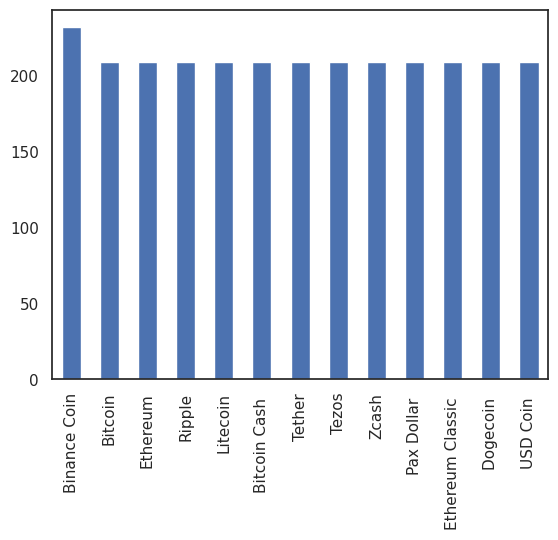

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

data[model_target].value_counts().plot.bar()
plt.show()

In [74]:
for c in categorical_features_all:
    print(data[c].value_counts())

In [75]:
for c in categorical_features_all:
    if len(data[c].value_counts()) < 50:
        print(c)
        data[c].value_counts().plot.bar()
        plt.show()

Last Price


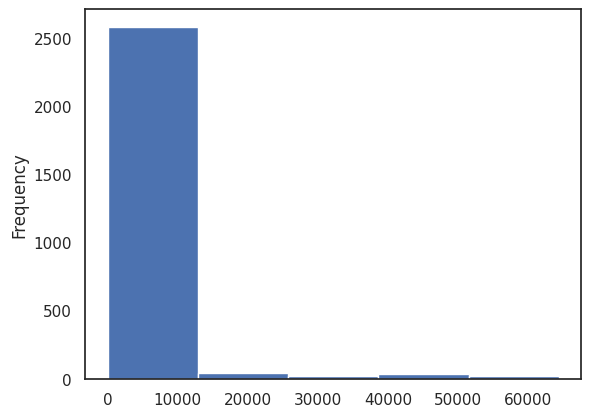

Open Price


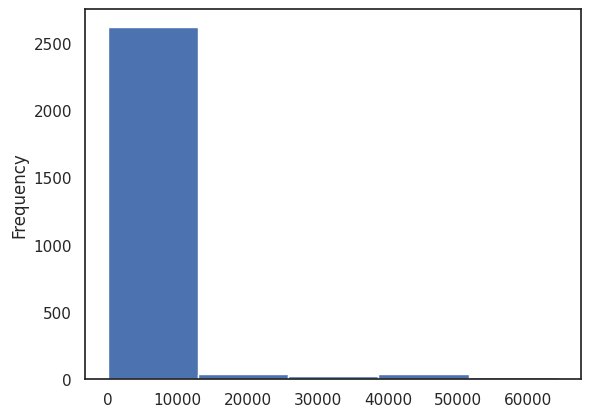

Max


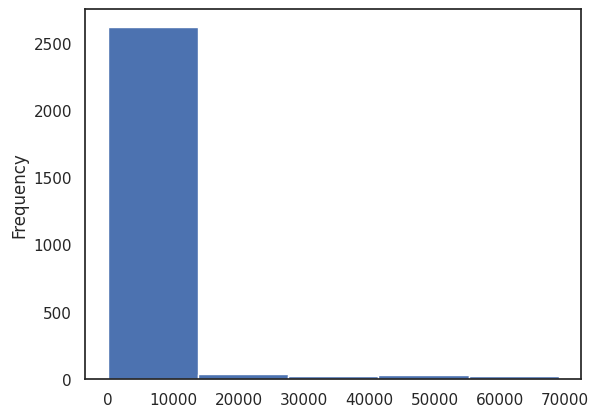

Min


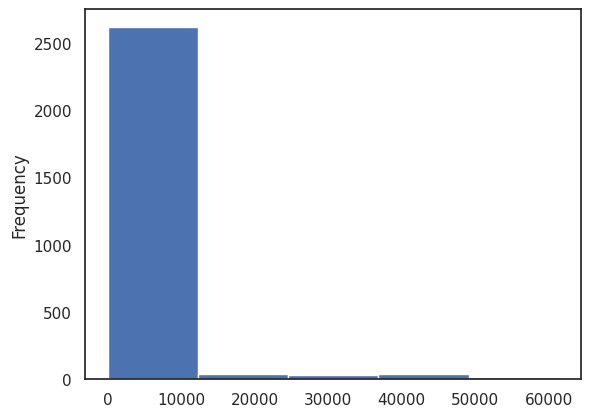

Size


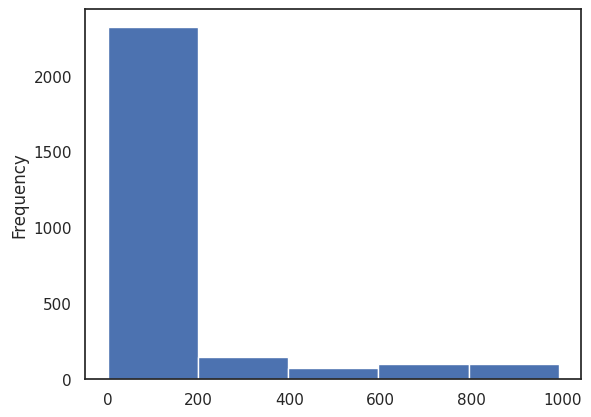

Change Persent


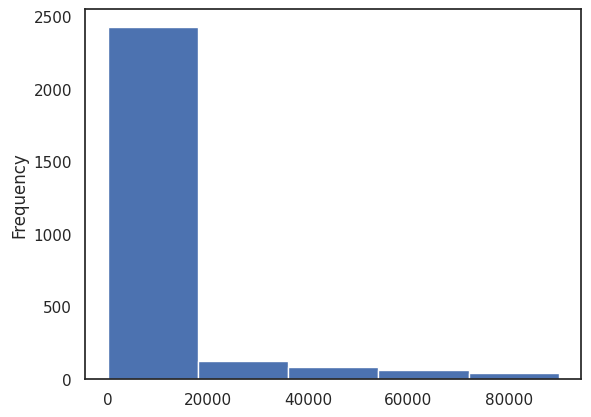

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    data[c].plot.hist(bins=5)
    plt.show()

In [77]:
for c in numerical_features_all:
    print(c)
    print('min:', data[c].min(), 'max:', data[c].max())

Last Price
min: 0.001687 max: 64398.6
Open Price
min: 0.001687 max: 64397.2
Max
min: 0.001925 max: 68990.6
Min
min: 0.001291 max: 61347.2
Size
min: 1.0 max: 992.61
Change Persent
min: 0.0 max: 90000.0


In [78]:
for c in numerical_features_all:
    print(c)
    print(data[c].value_counts(bins=10, sort=False))
    plt.show()

Last Price
(-64.39800000000001, 6439.862]    2509
(6439.862, 12879.721]               73
(12879.721, 19319.581]              23
(19319.581, 25759.441]              16
(25759.441, 32199.301]               9
(32199.301, 38639.161]              15
(38639.161, 45079.021]              18
(45079.021, 51518.88]               18
(51518.88, 57958.74]                 6
(57958.74, 64398.6]                 11
Name: Last Price, dtype: int64
Open Price
(-64.397, 6439.722]       2552
(6439.722, 12879.441]       73
(12879.441, 19319.161]      22
(19319.161, 25758.881]      16
(25758.881, 32198.601]       9
(32198.601, 38638.321]      15
(38638.321, 45078.041]      18
(45078.041, 51517.76]       18
(51517.76, 57957.48]         6
(57957.48, 64397.2]         11
Name: Open Price, dtype: int64
Max
(-68.99000000000001, 6899.062]    2549
(6899.062, 13798.122]               75
(13798.122, 20697.181]              22
(20697.181, 27596.241]              17
(27596.241, 34495.301]               7
(34495.301, 41394

In [79]:
for c in numerical_features_all:
    print(c)

    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    #Q1 = df[c].quantile(0.25)
    #Q3 = df[c].quantile(0.75)
    #IQR = Q3 - Q1
    #print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

    #dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    #dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)

    # Drop values beyond 90% of max()
    dropIndexes = data[data[c] > data[c].max()*9/10].index
    data.drop(dropIndexes , inplace=True)

Last Price
Open Price
Max
Min
Size
Change Persent


In [80]:
for c in numerical_features_all:
    print(c)
    print(data[c].value_counts(bins=10, sort=False))
    plt.show()

Last Price
(-47.666, 4766.692]       2437
(4766.692, 9533.381]        49
(9533.381, 14300.071]       34
(14300.071, 19066.761]      14
(19066.761, 23833.451]      19
(23833.451, 28600.141]       4
(28600.141, 33366.831]       7
(33366.831, 38133.52]       12
(38133.52, 42900.21]        16
(42900.21, 47666.9]          5
Name: Last Price, dtype: int64
Open Price
(-48.299, 4829.992]       2478
(4829.992, 9659.981]        52
(9659.981, 14489.971]       30
(14489.971, 19319.961]      19
(19319.961, 24149.951]      15
(24149.951, 28979.941]       2
(28979.941, 33809.931]       9
(33809.931, 38639.92]       12
(38639.92, 43469.91]        16
(43469.91, 48299.9]          4
Name: Open Price, dtype: int64
Max
(-49.763, 4976.432]       2477
(4976.432, 9952.862]        47
(9952.862, 14929.291]       36
(14929.291, 19905.721]      13
(19905.721, 24882.151]      19
(24882.151, 29858.581]       4
(29858.581, 34835.011]       6
(34835.011, 39811.44]        8
(39811.44, 44787.87]        18
(44787.87, 49

Last Price


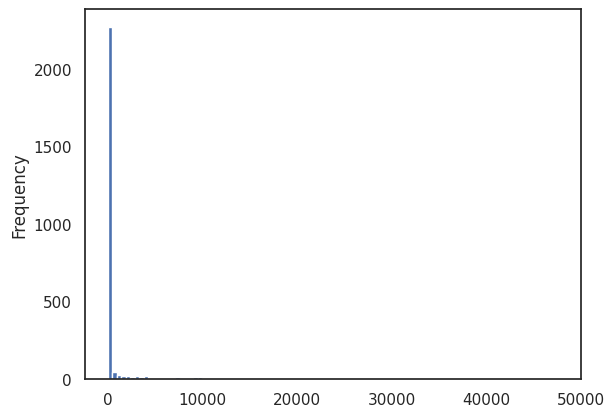

Open Price


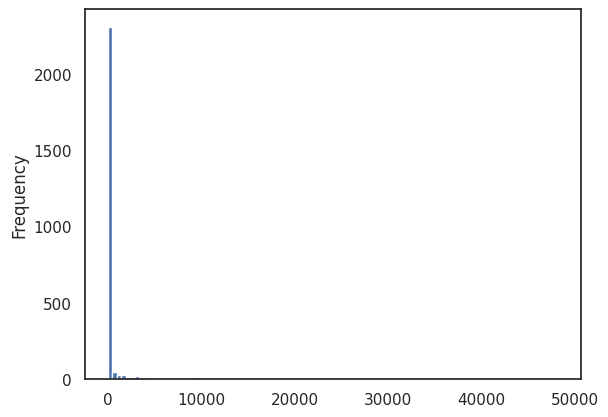

Max


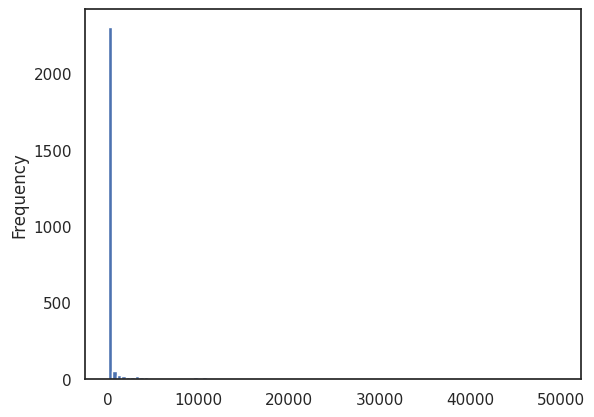

Min


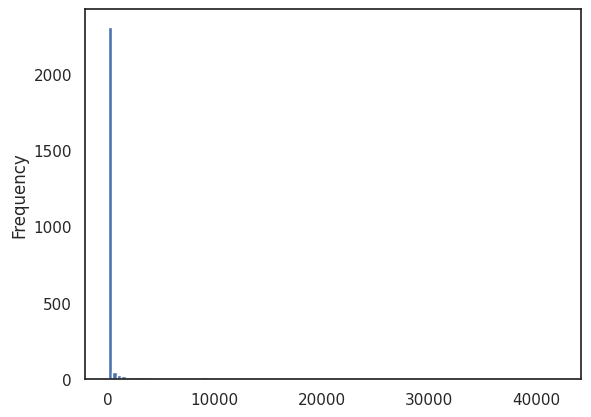

Size


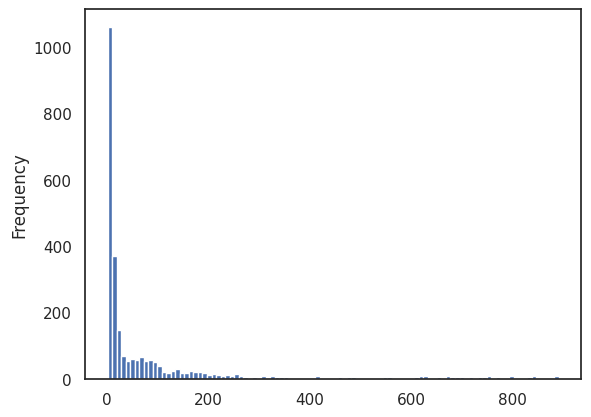

Change Persent


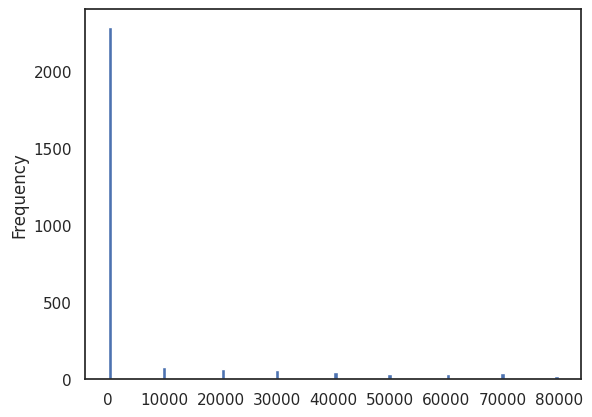

In [81]:
for c in numerical_features_all:
    print(c)
    data[c].plot.hist(bins=100)
    plt.show()

Scatter plot

Scatter plots are simple 2D plots of two numerical variables that can be used to examine the relationship between two variables.

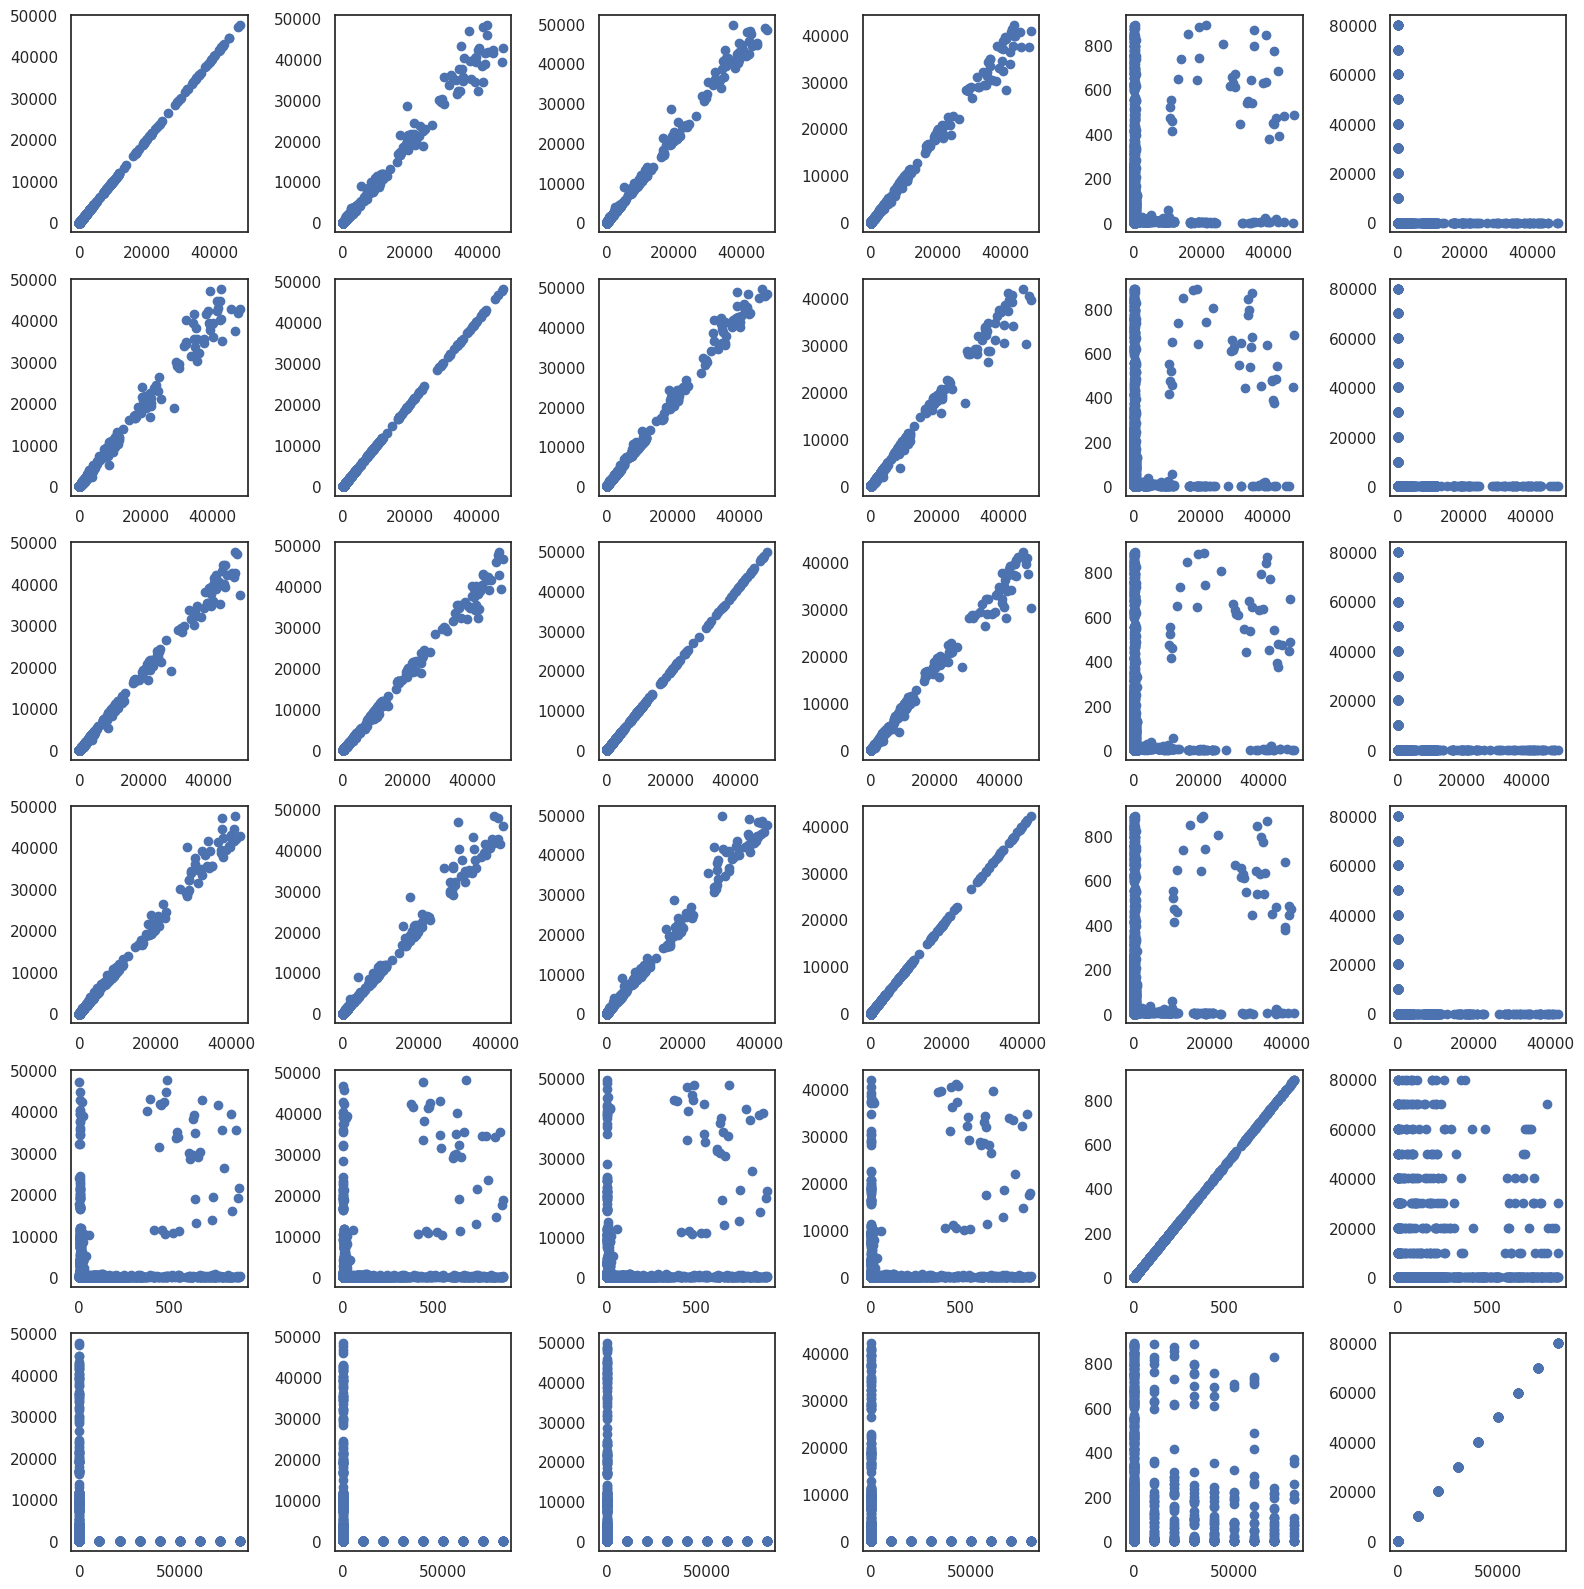

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(numerical_features_all), len(numerical_features_all), figsize=(16, 16), sharex=False, sharey=False)
for i in range(0,len(numerical_features_all)):
    for j in range(0,len(numerical_features_all)):
        axes[i,j].scatter(x = data[numerical_features_all[i]], y = data[numerical_features_all[j]])
fig.tight_layout()

Scatterplot with Identification

We can also add the target values, 0 or 1, to our scatter plot.

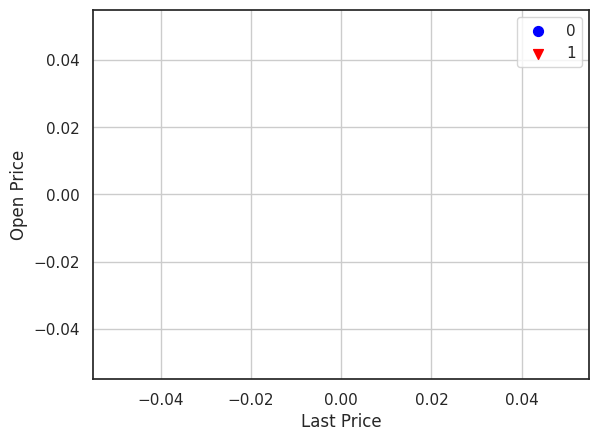

In [83]:
import seaborn as sns

X1 = data[[numerical_features_all[0], numerical_features_all[1]]][data[model_target] == 0]
X2 = data[[numerical_features_all[0], numerical_features_all[1]]][data[model_target] == 1]

plt.scatter(X1.iloc[:,0],
            X1.iloc[:,1],
            s=50,
            c='blue',
            marker='o',
            label='0')

plt.scatter(X2.iloc[:,0],
            X2.iloc[:,1],
            s=50,
            c='red',
            marker='v',
            label='1')

plt.xlabel(numerical_features_all[0])
plt.ylabel(numerical_features_all[1])
plt.legend()
plt.grid()
plt.show()

**Correlation Matrix Heatmat**

We plot the correlation matrix. Correlation scores are calculated for numerical fields.

In [84]:
cols=[numerical_features_all[0], numerical_features_all[1]]
#print(data[cols].corr())
data[cols].corr().style.background_gradient(cmap='tab20c')

,Last Price,Open Price
Last Price,1.000000,0.994239
Open Price,0.994239,1.000000


A fancy example using Seaborn


<Axes: >

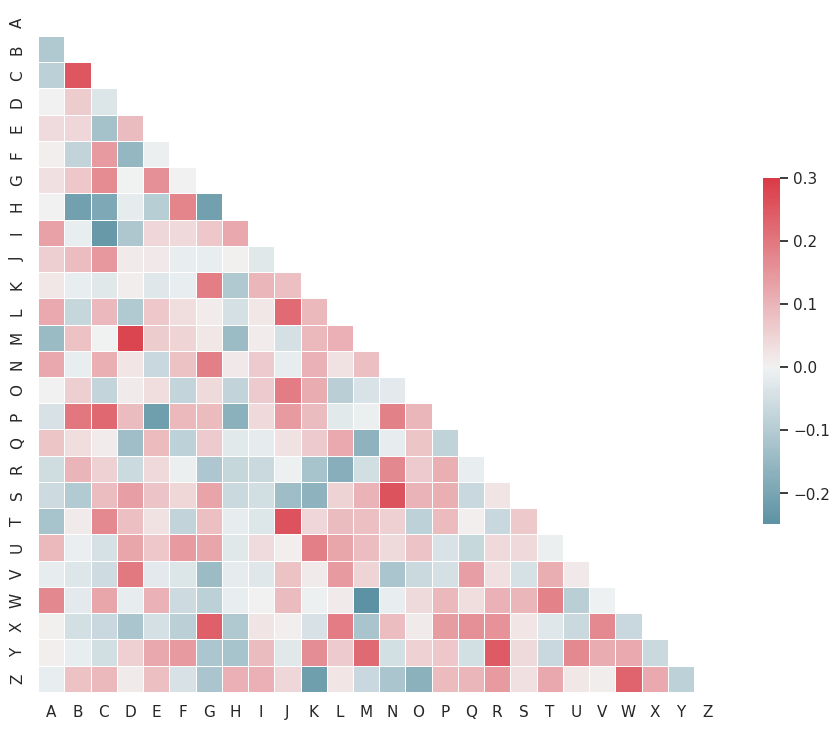

In [85]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.int64))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Let's first check the number of missing (nan) values for each column.

In [86]:
data.isna().sum()

Last Price        40
Open Price         0
Max                0
Min                0
Size               2
Change Persent     0
Class              0
dtype: int64

In [87]:
data['Last Price'].fillna(0, inplace = True)
data['Size'].fillna(0, inplace = True)

In [88]:
print(data.isnull().sum())

Last Price        0
Open Price        0
Max               0
Min               0
Size              0
Change Persent    0
Class             0
dtype: int64


In [89]:
# تقسيم البيانات إلى متغيرات الدخل (المتغيرات المستقلة) والمخرجات (المتغيرات المعتمدة)
X = data.drop(columns=['Class'])
y = data['Class']


In [90]:
# تقسيم البيانات إلى مجموعة التدريب ومجموعة الاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
# تهيئة وتدريب النماذج
models = {
    "Logistic Regression": LogisticRegression(),
    "Principal Component Analysis + Logistic Regression": Pipeline([
        ("PCA", PCA(n_components=2)),
        ("Logistic Regression", LogisticRegression())
    ]),
    "K-Means Clustering": KMeans(n_clusters=2),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100)
}

In [92]:
for name, model in models.items():
    print("\n", name)
    if name == "Principal Component Analysis + Logistic Regression":
        # تطبيق PCA ثم النموذج التنبؤي
        pipeline = Pipeline([
            ("PCA", PCA(n_components=2)),
            ("Logistic Regression", LogisticRegression())
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
    elif name == "K-Means Clustering":
        # تنفيذ K-Means Clustering والتنبؤ
        model.fit(X_train)
        y_pred = model.predict(X_test)
    elif name == "Random Forest Classifier":
        # تنفيذ Random Forest Classifier والتنبؤ
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # تدريب وتنبؤ باستخدام النموذج المباشر
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)



 Logistic Regression

 Principal Component Analysis + Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


 K-Means Clustering

 Random Forest Classifier


In [93]:
# حساب مصفوفة الارتباك
conf_matrix = confusion_matrix(y_test, y_pred)
print("مصفوفة الارتباك:")
print(conf_matrix)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)
print("الدقة:", accuracy)

مصفوفة الارتباك:
[[ 6  0  2  0  0  0  0  0 39  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  4  0  0  0  0  0  1]
 [ 2  0  0 41  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0 36  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0 39  2  0  0  0  3  0  3]
 [ 1  0  3  0  1  0 21  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0 28  0  6  0  3  0]
 [47  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0 34  0  4  0]
 [ 3  0  0  1  0  3  0  0  0  0 40  3  0]
 [ 0  0  0  0  0  0  0  5  0  2  0 30  0]
 [ 0  0  3  0  0  1  3  0  0  0  0  0 31]]
الدقة: 0.6875
